------------------------------
Model Evaluation for Houses
------------------------------


       post_type   area  price          street        ward    district
0  Bán nhà riêng   72.0   1.85  Đinh Đức Thiện  Bình Chánh  Bình Chánh
1  Bán nhà riêng   80.0   1.44  Đinh Đức Thiện  Bình Chánh  Bình Chánh
2  Bán nhà riêng   60.0   0.77  Đinh Đức Thiện  Bình Chánh  Bình Chánh
3  Bán nhà riêng   80.0   1.30  Đinh Đức Thiện  Bình Chánh  Bình Chánh
4  Bán nhà riêng  113.0   1.10  Đinh Đức Thiện  Bình Chánh  Bình Chánh
Data length:  83

Linear Regression Model:


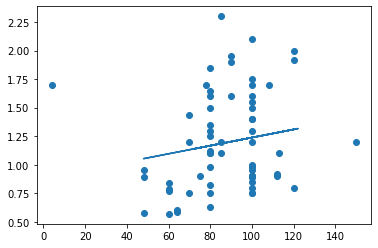

Linear Regression training model score:  -0.06955152717698776 



       post_type   area  price          street         ward    district
0  Bán nhà riêng   80.0   1.10  Đinh Đức Thiện  Tân Quý Tây  Bình Chánh
1  Bán nhà riêng  125.0   1.20  Đinh Đức Thiện  Tân Quý Tây  Bình Chánh
2  Bán nhà riêng   90.0   1.40  Đinh Đức Thiện  Tân Quý Tây  Bình Chánh
3  Bán nhà riêng  100.0   0.95  Đinh Đức Thiện  Tân Quý Tây  Bình Chánh
4  Bán nhà riêng  110.0   0.98  Đinh Đức Thiện  Tân Quý Tây  Bình Chánh
Data length:  19

Linear Regression Model:


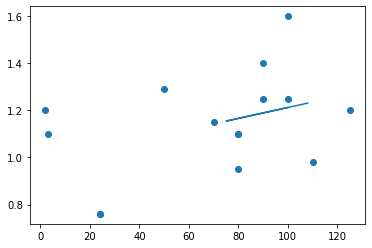

Linear Regression training model score:  -0.0032018713583632508 



       post_type  area   price      street      ward    district
0  Bán nhà riêng  66.0  0.5210  Quốc Lộ 50  Đa Phước  Bình Chánh
1  Bán nhà riêng  70.0  0.5200  Quốc Lộ 50  Đa Phước  Bình Chánh
2  Bán nhà riêng  42.0  0.5220  Quốc Lộ 50  Đa Phước  Bình Chánh
3  Bán nhà riêng  64.0  0.6565  Quốc Lộ 50  Đa Phước  Bình Chánh
4  Bán nhà riêng  80.0  0.5700  Quốc Lộ 50  Đa Phước  Bình Chánh
Data length:  18

Linear Regression Model:


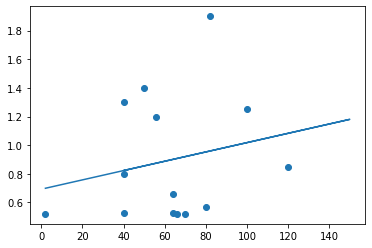

Linear Regression training model score:  -2.0362759159892554 



In [1]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model


# convert to array:
# area = np.array(data['area'])
# price = np.array(data['price'])
# plt.scatter(area, price, marker='o')
# plt.show()

# Database Connection:
conn = psycopg2.connect(database="real_estate_data", user="postgres", password="361975Warcraft")
cur = conn.cursor()

def getData(post_type, street, ward, district, conn):
    # cur = conn.cursor()
    query = """
        SELECT post_type, area, price, street, ward, district
        FROM bds_realestatedata 
        WHERE
            post_type = '{post_type}' AND
            area IS NOT NULL AND
            price IS NOT NULL AND
            street = '{street}' AND
            ward = '{ward}' AND
            district = '{district}';
    """.format(post_type=post_type, street=street, ward=ward, district=district)
    # cur.execute(query)
    # data = cur.fetchall()
    data = pd.read_sql_query(query, con=conn)

    # data info
    print(data.head())
    print("Data length: ", len(data))
    return data

def splitData(data):
    # Selection few attributes
    attributes = list(
        [
            'area',
        ]
    )
    
    # Vector attributes of lands
    X = data[attributes]
    # Vector price of land
    Y = data['price']
    
    # Convert into arr:
    X = np.array(X)
    Y = np.array(Y)
    
    # plt.plot(Y)
    # plt.show()
    
    # Split data to training test and testing test
    # training data : testing data = 80 : 20
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    
    return X_train, X_test, Y_train, Y_test

# Linear Regression Model:
def linearRegressionModel(X_train, Y_train, X_test, Y_test):
    model = linear_model.LinearRegression()

    # Training process
    model.fit(X_train, Y_train)
    
    # Evaluating the model
    print("\nLinear Regression Model:")
    yfit = model.predict(X_test)
    plt.scatter(X_train, Y_train, marker='o')
    plt.plot(X_test, yfit)
    plt.show()
    
    score_trained = model.score(X_test, Y_test)

    return score_trained

# Lasso Model:
def lassoRegressionModel(X_train, Y_train, X_test, Y_test):
    model = linear_model.Lasso(alpha=1.0)

    # Training process:
    model.fit(X_train, Y_train)
    
    # Evaluating the model
    print("\nLasso Model:")
    yfit = model.predict(X_test)
    plt.scatter(X_train, Y_train, marker='o')
    plt.plot(X_test, yfit)
    plt.show()

    # Evaluation the model:
    score_trained = model.score(X_test, Y_test)
    
    return score_trained


# Houses:
print("------------------------------")
print("Model Evaluation for Houses")
print("------------------------------")

cur.execute("SELECT post_type, street, ward, district, COUNT(id) FROM bds_realestatedata WHERE street IS NOT NULL AND ward IS NOT NULL AND district = %s AND post_type = %s GROUP BY post_type, street, ward, district HAVING COUNT(id) > %s;", ( 'Bình Chánh', 'Bán nhà riêng', 10 ) )
item_lst = cur.fetchall()

for item in item_lst:
    post_type = item[0]
    street = item[1]
    ward = item[2]
    district = item[3]
    print("\n")
    data = getData(post_type, street, ward, district, conn)
    X_train, X_test, Y_train, Y_test = splitData(data)

    score = linearRegressionModel(X_train, Y_train, X_test, Y_test)
    print("Linear Regression training model score: ", score, "\n")

# Close connection:
cur.close()
conn.close()

------------------------------
Model Evaluation for Lands
------------------------------


  post_type    area  price street          ward    district
0   Bán đất   580.0  11.02  An Hạ  Phạm Văn Hai  Bình Chánh
1   Bán đất   166.0   3.40  An Hạ  Phạm Văn Hai  Bình Chánh
2   Bán đất  2000.0  15.00  An Hạ  Phạm Văn Hai  Bình Chánh
3   Bán đất   145.0   3.00  An Hạ  Phạm Văn Hai  Bình Chánh
4   Bán đất   567.0   7.50  An Hạ  Phạm Văn Hai  Bình Chánh
Data length:  18

Linear Regression Model:


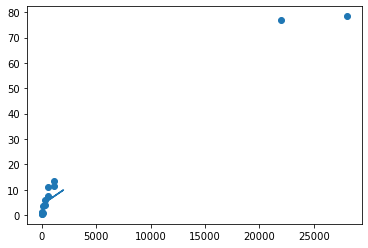

Linear Regression training model score:  0.4286319795970642 



  post_type   area  price          street        ward    district
0   Bán đất  260.0   5.30  Đinh Đức Thiện  Bình Chánh  Bình Chánh
1   Bán đất  106.0   1.69  Đinh Đức Thiện  Bình Chánh  Bình Chánh
2   Bán đất   90.0   2.10  Đinh Đức Thiện  Bình Chánh  Bình Chánh
3   Bán đất  260.0   3.60  Đinh Đức Thiện  Bình Chánh  Bình Chánh
4   Bán đất   90.0   1.60  Đinh Đức Thiện  Bình Chánh  Bình Chánh
Data length:  26

Linear Regression Model:


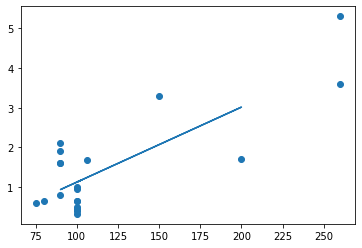

Linear Regression training model score:  -5.355004730699811 



  post_type   area  price            street       ward    district
0   Bán đất   80.0    2.0  Đoàn Nguyễn Tuấn  Hưng Long  Bình Chánh
1   Bán đất  100.0    2.0  Đoàn Nguyễn Tuấn  Hưng Long  Bình Chánh
2   Bán đất   90.0    1.8  Đoàn Nguyễn Tuấn  Hưng Long  Bình Chánh
3   Bán đất  150.0    0.9  Đoàn Nguyễn Tuấn  Hưng Long  Bình Chánh
4   Bán đất  125.0    3.8  Đoàn Nguyễn Tuấn  Hưng Long  Bình Chánh
Data length:  31

Linear Regression Model:


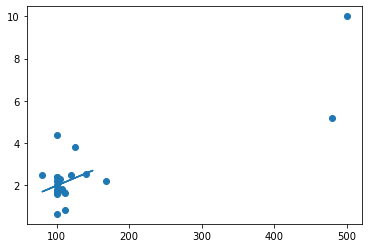

Linear Regression training model score:  -3.796936523827349 



  post_type    area  price            street     ward    district
0   Bán đất  2025.0   5.30  Đoàn Nguyễn Tuấn  Quy Đức  Bình Chánh
1   Bán đất   150.0   2.65  Đoàn Nguyễn Tuấn  Quy Đức  Bình Chánh
2   Bán đất   150.0   2.65  Đoàn Nguyễn Tuấn  Quy Đức  Bình Chánh
3   Bán đất   100.0   1.85  Đoàn Nguyễn Tuấn  Quy Đức  Bình Chánh
4   Bán đất   150.0   2.70  Đoàn Nguyễn Tuấn  Quy Đức  Bình Chánh
Data length:  15

Linear Regression Model:


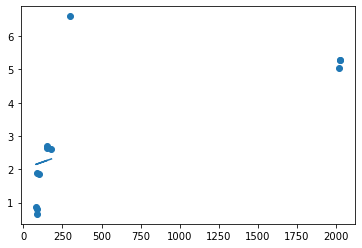

Linear Regression training model score:  0.17527329898878685 



  post_type  area  price          street      ward    district
0   Bán đất  84.0    2.6  Dương Đình Cúc  Tân Kiên  Bình Chánh
1   Bán đất  80.0    2.6  Dương Đình Cúc  Tân Kiên  Bình Chánh
2   Bán đất  84.8    3.2  Dương Đình Cúc  Tân Kiên  Bình Chánh
3   Bán đất  83.0    2.6  Dương Đình Cúc  Tân Kiên  Bình Chánh
4   Bán đất  80.0    1.2  Dương Đình Cúc  Tân Kiên  Bình Chánh
Data length:  15

Linear Regression Model:


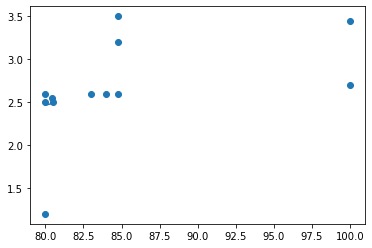

Linear Regression training model score:  -7.692241335565976 



  post_type   area  price           street        ward    district
0   Bán đất   80.0   1.80  Hoàng Phan Thái  Bình Chánh  Bình Chánh
1   Bán đất   80.0   1.52  Hoàng Phan Thái  Bình Chánh  Bình Chánh
2   Bán đất  135.0   2.20  Hoàng Phan Thái  Bình Chánh  Bình Chánh
3   Bán đất  350.0   8.75  Hoàng Phan Thái  Bình Chánh  Bình Chánh
4   Bán đất  120.0   2.16  Hoàng Phan Thái  Bình Chánh  Bình Chánh
Data length:  28

Linear Regression Model:


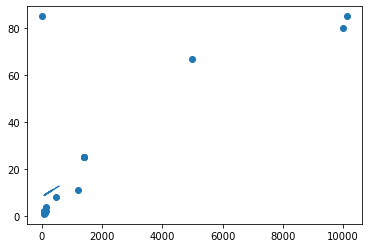

Linear Regression training model score:  -5.9529240716364615 



  post_type   area  price          street        ward    district
0   Bán đất  272.0   11.0  Lại Hùng Cường  Vĩnh Lộc B  Bình Chánh
1   Bán đất  125.0    6.5  Lại Hùng Cường  Vĩnh Lộc B  Bình Chánh
2   Bán đất  120.0    1.9  Lại Hùng Cường  Vĩnh Lộc B  Bình Chánh
3   Bán đất  107.0    3.0  Lại Hùng Cường  Vĩnh Lộc B  Bình Chánh
4   Bán đất  100.0    0.8  Lại Hùng Cường  Vĩnh Lộc B  Bình Chánh
Data length:  12

Linear Regression Model:


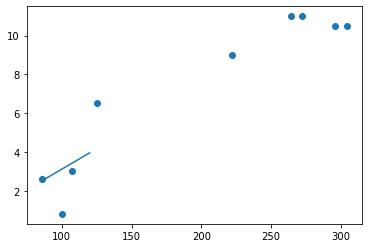

Linear Regression training model score:  -4.26053925953844 



  post_type    area  price           street       ward    district
0   Bán đất   100.0  1.400  Nguyễn Văn Linh  Bình Hưng  Bình Chánh
1   Bán đất    90.0  1.950  Nguyễn Văn Linh  Bình Hưng  Bình Chánh
2   Bán đất   100.0  2.800  Nguyễn Văn Linh  Bình Hưng  Bình Chánh
3   Bán đất  3530.0  7.766  Nguyễn Văn Linh  Bình Hưng  Bình Chánh
4   Bán đất   100.0  1.300  Nguyễn Văn Linh  Bình Hưng  Bình Chánh
Data length:  19

Linear Regression Model:


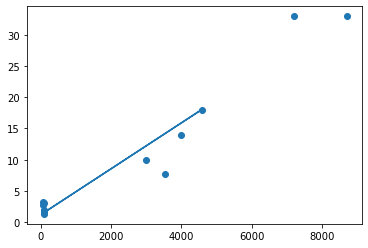

Linear Regression training model score:  0.9626753284605335 



  post_type   area  price     street       ward    district
0   Bán đất   86.0    1.8  Phạm Hùng  Bình Hưng  Bình Chánh
1   Bán đất  100.0    1.2  Phạm Hùng  Bình Hưng  Bình Chánh
2   Bán đất   75.0    2.3  Phạm Hùng  Bình Hưng  Bình Chánh
3   Bán đất   80.0    1.3  Phạm Hùng  Bình Hưng  Bình Chánh
4   Bán đất  100.0    3.2  Phạm Hùng  Bình Hưng  Bình Chánh
Data length:  28

Linear Regression Model:


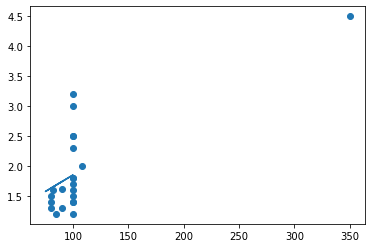

Linear Regression training model score:  -0.5353654148487148 



  post_type    area  price      street       ward    district
0   Bán đất  111.98    2.8  Quốc Lộ 50  Phong Phú  Bình Chánh
1   Bán đất  108.00    2.5  Quốc Lộ 50  Phong Phú  Bình Chánh
2   Bán đất   70.00    1.5  Quốc Lộ 50  Phong Phú  Bình Chánh
3   Bán đất   50.00    3.2  Quốc Lộ 50  Phong Phú  Bình Chánh
4   Bán đất   90.00    1.2  Quốc Lộ 50  Phong Phú  Bình Chánh
Data length:  28

Linear Regression Model:


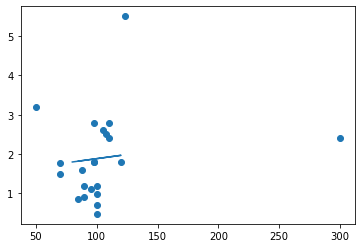

Linear Regression training model score:  -0.3359262585921958 



  post_type   area  price    street       ward    district
0   Bán đất  215.8   2.10  Tân Liêm  Phong Phú  Bình Chánh
1   Bán đất  100.0   0.55  Tân Liêm  Phong Phú  Bình Chánh
2   Bán đất  100.0   0.65  Tân Liêm  Phong Phú  Bình Chánh
3   Bán đất  100.0   0.56  Tân Liêm  Phong Phú  Bình Chánh
4   Bán đất  100.0   0.65  Tân Liêm  Phong Phú  Bình Chánh
Data length:  13

Linear Regression Model:


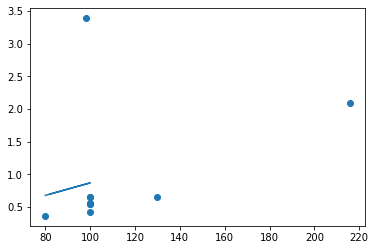

Linear Regression training model score:  -1.4491391232072823 



  post_type   area  price      street          ward    district
0   Bán đất  210.0   3.15  Thanh Niên  Phạm Văn Hai  Bình Chánh
1   Bán đất  130.0   2.34  Thanh Niên  Phạm Văn Hai  Bình Chánh
2   Bán đất   75.0   0.95  Thanh Niên  Phạm Văn Hai  Bình Chánh
3   Bán đất  145.0   2.40  Thanh Niên  Phạm Văn Hai  Bình Chánh
4   Bán đất  154.0   2.40  Thanh Niên  Phạm Văn Hai  Bình Chánh
Data length:  11

Linear Regression Model:


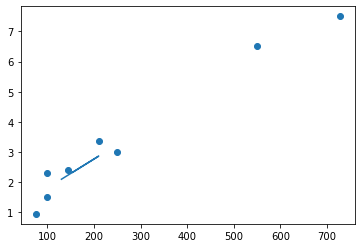

Linear Regression training model score:  0.6472586922041627 



  post_type    area  price           street          ward    district
0   Bán đất  2000.0   18.0  Thích Thiện Hòa  Lê Minh Xuân  Bình Chánh
1   Bán đất  2125.0   22.0  Thích Thiện Hòa  Lê Minh Xuân  Bình Chánh
2   Bán đất   500.0    6.8  Thích Thiện Hòa  Lê Minh Xuân  Bình Chánh
3   Bán đất  1150.0   13.2  Thích Thiện Hòa  Lê Minh Xuân  Bình Chánh
4   Bán đất   362.0    5.0  Thích Thiện Hòa  Lê Minh Xuân  Bình Chánh
Data length:  11

Linear Regression Model:


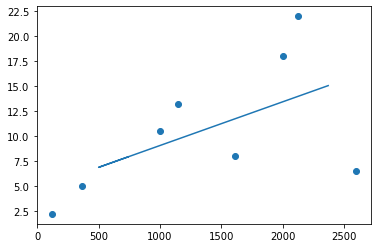

Linear Regression training model score:  0.6588557014990866 



  post_type   area  price      street          ward    district
0   Bán đất   82.0    1.3  Tỉnh Lộ 10  Lê Minh Xuân  Bình Chánh
1   Bán đất  260.0    3.9  Tỉnh Lộ 10  Lê Minh Xuân  Bình Chánh
2   Bán đất  100.0    3.0  Tỉnh Lộ 10  Lê Minh Xuân  Bình Chánh
3   Bán đất   80.0    3.6  Tỉnh Lộ 10  Lê Minh Xuân  Bình Chánh
4   Bán đất  138.0    4.1  Tỉnh Lộ 10  Lê Minh Xuân  Bình Chánh
Data length:  38

Linear Regression Model:


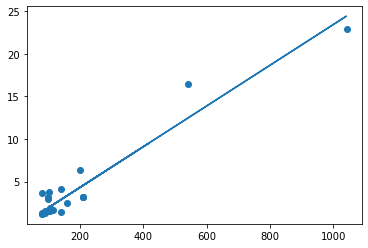

Linear Regression training model score:  0.8337261759373816 



  post_type   area  price      street          ward    district
0   Bán đất  120.0   3.65  Tỉnh Lộ 10  Phạm Văn Hai  Bình Chánh
1   Bán đất   80.0   1.60  Tỉnh Lộ 10  Phạm Văn Hai  Bình Chánh
2   Bán đất  260.0   3.90  Tỉnh Lộ 10  Phạm Văn Hai  Bình Chánh
3   Bán đất  105.0   1.70  Tỉnh Lộ 10  Phạm Văn Hai  Bình Chánh
4   Bán đất  105.0   1.70  Tỉnh Lộ 10  Phạm Văn Hai  Bình Chánh
Data length:  55

Linear Regression Model:


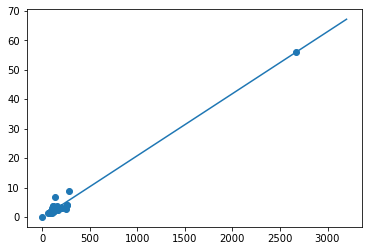

Linear Regression training model score:  0.8776443642729772 



  post_type   area  price         street          ward    district
0   Bán đất  168.0    4.4  Trần Văn Giàu  Lê Minh Xuân  Bình Chánh
1   Bán đất   80.0    1.2  Trần Văn Giàu  Lê Minh Xuân  Bình Chánh
2   Bán đất   80.0    1.2  Trần Văn Giàu  Lê Minh Xuân  Bình Chánh
3   Bán đất  200.0    3.0  Trần Văn Giàu  Lê Minh Xuân  Bình Chánh
4   Bán đất  100.0    1.5  Trần Văn Giàu  Lê Minh Xuân  Bình Chánh
Data length:  100

Linear Regression Model:


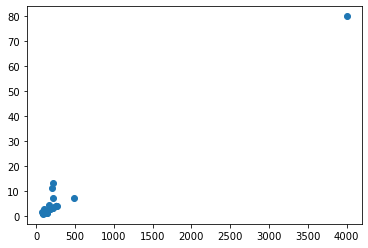

Linear Regression training model score:  0.7406248771603519 



  post_type   area  price         street          ward    district
0   Bán đất  485.0  7.500  Trần Văn Giàu  Phạm Văn Hai  Bình Chánh
1   Bán đất  128.0  5.632  Trần Văn Giàu  Phạm Văn Hai  Bình Chánh
2   Bán đất   90.0  2.900  Trần Văn Giàu  Phạm Văn Hai  Bình Chánh
3   Bán đất   80.0  1.200  Trần Văn Giàu  Phạm Văn Hai  Bình Chánh
4   Bán đất   80.0  1.200  Trần Văn Giàu  Phạm Văn Hai  Bình Chánh
Data length:  136

Linear Regression Model:


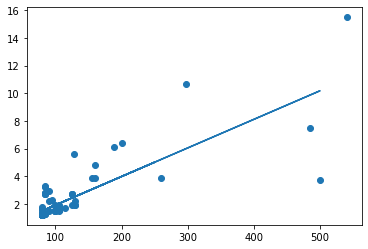

Linear Regression training model score:  -0.6315516457380845 



  post_type   area  price            street       ward    district
0   Bán đất   80.0   2.40  Trịnh Quang Nghị  Phong Phú  Bình Chánh
1   Bán đất   80.0   0.79  Trịnh Quang Nghị  Phong Phú  Bình Chánh
2   Bán đất  100.0   0.56  Trịnh Quang Nghị  Phong Phú  Bình Chánh
3   Bán đất   90.0   1.60  Trịnh Quang Nghị  Phong Phú  Bình Chánh
4   Bán đất  100.0   0.55  Trịnh Quang Nghị  Phong Phú  Bình Chánh
Data length:  16

Linear Regression Model:


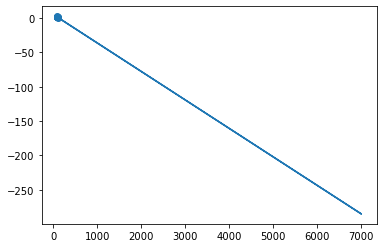

Linear Regression training model score:  -372.8093008461392 



  post_type  area  price    street        ward    district
0   Bán đất  85.7    2.7  Vĩnh Lộc  Vĩnh Lộc B  Bình Chánh
1   Bán đất  80.0    2.7  Vĩnh Lộc  Vĩnh Lộc B  Bình Chánh
2   Bán đất  80.0    2.7  Vĩnh Lộc  Vĩnh Lộc B  Bình Chánh
3   Bán đất  85.0    2.7  Vĩnh Lộc  Vĩnh Lộc B  Bình Chánh
4   Bán đất  80.0    2.7  Vĩnh Lộc  Vĩnh Lộc B  Bình Chánh
Data length:  56

Linear Regression Model:


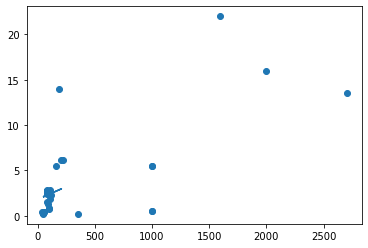

Linear Regression training model score:  0.23564164025115075 



  post_type   area  price      street          ward    district
0   Bán đất   85.0    4.0  Võ Văn Vân  Phạm Văn Hai  Bình Chánh
1   Bán đất   80.0    1.2  Võ Văn Vân  Phạm Văn Hai  Bình Chánh
2   Bán đất  120.0    3.9  Võ Văn Vân  Phạm Văn Hai  Bình Chánh
3   Bán đất  120.0    3.9  Võ Văn Vân  Phạm Văn Hai  Bình Chánh
4   Bán đất  120.0    2.6  Võ Văn Vân  Phạm Văn Hai  Bình Chánh
Data length:  21

Linear Regression Model:


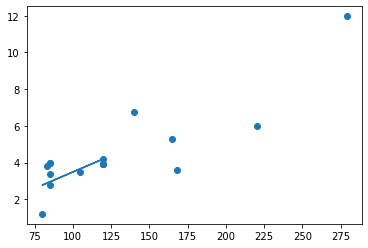

Linear Regression training model score:  -1.9093959717206976 



  post_type    area   price      street        ward    district
0   Bán đất   408.0  20.808  Võ Văn Vân  Vĩnh Lộc B  Bình Chánh
1   Bán đất    87.4   2.100  Võ Văn Vân  Vĩnh Lộc B  Bình Chánh
2   Bán đất   210.0   9.500  Võ Văn Vân  Vĩnh Lộc B  Bình Chánh
3   Bán đất  5468.0  47.000  Võ Văn Vân  Vĩnh Lộc B  Bình Chánh
4   Bán đất  5468.0  55.000  Võ Văn Vân  Vĩnh Lộc B  Bình Chánh
Data length:  12

Linear Regression Model:


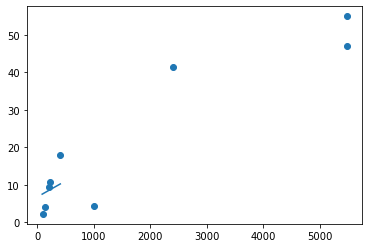

Linear Regression training model score:  0.15469097403791676 



  post_type    area  price     street      ward    district
0   Bán đất   105.0  1.580  Vườn Thơm  Bình Lợi  Bình Chánh
1   Bán đất  1000.0  1.800  Vườn Thơm  Bình Lợi  Bình Chánh
2   Bán đất   105.0  1.600  Vườn Thơm  Bình Lợi  Bình Chánh
3   Bán đất  1250.0  6.125  Vườn Thơm  Bình Lợi  Bình Chánh
4   Bán đất   105.0  1.580  Vườn Thơm  Bình Lợi  Bình Chánh
Data length:  26

Linear Regression Model:


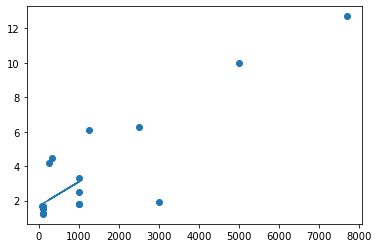

Linear Regression training model score:  -1.082856423790929 



In [2]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model


# convert to array:
# area = np.array(data['area'])
# price = np.array(data['price'])
# plt.scatter(area, price, marker='o')
# plt.show()

# Database Connection:
conn = psycopg2.connect(database="real_estate_data", user="postgres", password="361975Warcraft")
cur = conn.cursor()

def getData(post_type, street, ward, district, conn):
    # cur = conn.cursor()
    query = """
        SELECT post_type, area, price, street, ward, district
        FROM bds_realestatedata 
        WHERE
            post_type = '{post_type}' AND
            area IS NOT NULL AND
            price IS NOT NULL AND
            street = '{street}' AND
            ward = '{ward}' AND
            district = '{district}';
    """.format(post_type=post_type, street=street, ward=ward, district=district)
    # cur.execute(query)
    # data = cur.fetchall()
    data = pd.read_sql_query(query, con=conn)

    # data info
    print(data.head())
    print("Data length: ", len(data))
    return data

def splitData(data):
    # Selection few attributes
    attributes = list(
        [
            'area',
        ]
    )
    
    # Vector attributes of lands
    X = data[attributes]
    # Vector price of land
    Y = data['price']
    
    # Convert into arr:
    X = np.array(X)
    Y = np.array(Y)
    
    # plt.plot(Y)
    # plt.show()
    
    # Split data to training test and testing test
    # training data : testing data = 80 : 20
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    
    return X_train, X_test, Y_train, Y_test

# Linear Regression Model:
def linearRegressionModel(X_train, Y_train, X_test, Y_test):
    model = linear_model.LinearRegression()

    # Training process
    model.fit(X_train, Y_train)
    
    # Evaluating the model
    print("\nLinear Regression Model:")
    yfit = model.predict(X_test)
    plt.scatter(X_train, Y_train, marker='o')
    plt.plot(X_test, yfit)
    plt.show()
    
    score_trained = model.score(X_test, Y_test)

    return score_trained

# Lasso Model:
def lassoRegressionModel(X_train, Y_train, X_test, Y_test):
    model = linear_model.Lasso(alpha=1.0)

    # Training process:
    model.fit(X_train, Y_train)
    
    # Evaluating the model
    print("\nLasso Model:")
    yfit = model.predict(X_test)
    plt.scatter(X_train, Y_train, marker='o')
    plt.plot(X_test, yfit)
    plt.show()

    # Evaluation the model:
    score_trained = model.score(X_test, Y_test)
    
    return score_trained

# Lands:
print("------------------------------")
print("Model Evaluation for Lands")
print("------------------------------")

cur.execute("SELECT post_type, street, ward, district, COUNT(id) FROM bds_realestatedata WHERE street IS NOT NULL AND ward IS NOT NULL AND district = %s AND post_type = %s GROUP BY post_type, street, ward, district HAVING COUNT(id) > %s;", ( 'Bình Chánh', 'Bán đất', 10 ) )
item_lst = cur.fetchall()

for item in item_lst:
    post_type = item[0]
    street = item[1]
    ward = item[2]
    district = item[3]
    print("\n")
    data = getData(post_type, street, ward, district, conn)
    X_train, X_test, Y_train, Y_test = splitData(data)

    score = linearRegressionModel(X_train, Y_train, X_test, Y_test)
    print("Linear Regression training model score: ", score, "\n")

# Close connection:
cur.close()
conn.close()